<a href="https://colab.research.google.com/github/khondkar/Machine-Learning-Practice-Project-SuperKarts/blob/main/Learner_Notebook_Machine_Learning_Practice_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning Practice Project: SuperKart**

--------------------
## **Context:**
--------------------

A sales forecast is a prediction of future sales revenue based on historical data, industry trends, and the status of the current sales pipeline. Businesses use the sales forecast to estimate weekly, monthly, quarterly, and annual sales totals. It is extremely important for a company to make an accurate sales forecast as it adds value across an organization and helps the different verticals to chalk out their future course of action. Forecasting helps an organization plan its sales operations by region and provides valuable insights to the supply chain team regarding the procurement of goods and materials.
An accurate sales forecast process has many benefits which include improved decision-making about the future and reduction of sales pipeline and forecast risks. Moreover, it helps to reduce the time spent in planning territory coverage and establish benchmarks that can be used to assess trends in the future.

---------------------------
## **Objective:**
----------------------------

SuperKart is an organization that owns a chain of supermarkets and food marts providing a wide range of products. They want to predict the future sales revenue of its different outlets so that they can strategize their sales operation across different tier cities and plan their inventory accordingly. To achieve this purpose, SuperKart has hired a data science firm, shared the sales records of its various outlets for the previous quarter, and asked the firm to come up with a suitable model to predict the total sales of the stores for the upcoming quarter.

---------------------------------
## **Data Description:**
---------------------------------

The data contains the different attributes of the various products and stores. The detailed data dictionary is given below.

* Product_Id - unique identifier of each product, each identifier having two letters at the beginning followed by a number.
* Product_Weight - the weight of each product
* Product_Sugar_Content - sugar content of each product like low sugar, regular, and no sugar
* Product_Allocated_Area - the ratio of the allocated display area of each product to the total display area of all the products in a store
* Product_Type - broad category for each product like meat, snack foods, hard drinks, dairy, canned, soft drinks, health and hygiene, baking goods, bread, breakfast, frozen foods, fruits and vegetables, household, seafood, starchy foods, others
* Product_MRP - maximum retail price of each product
* Store_Id - unique identifier of each store
* Store_Establishment_Year - the year in which the store was established
* Store_Size - the size of the store depending on sq. feet like high, medium, and low
* Store_Location_City_Type - the type of city in which the store is located like Tier 1, Tier 2, and Tier 3. Tier 1 consists of cities where the standard of living is comparatively higher than its Tier 2 and Tier 3 counterparts.
* Store_Type - the type of store depending on the products that are being sold there like Departmental Store, Supermarket Type 1, Supermarket Type 2, and Food Mart
* Product_Store_Sales_Total - total revenue generated by the sale of that particular product in that particular store


## **Importing the necessary libraries and overview of the dataset**

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# Import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

### **Importing the Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kart = pd.read_csv("/content/drive/MyDrive/SuperKart.csv")

In [ ]:
# Copying data to another variable to avoid any changes to original data
data = kart.copy()

### **View the first and last 5 rows of the dataset**

In [ ]:
# Check the head of the data
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


In [ ]:
# Check the tail of the data
data.tail()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
8758,NC7546,14.80,No Sugar,0.016,Health and Hygiene,140.53,OUT004,2009,Medium,Tier 2,Supermarket Type2,3806.53
8759,NC584,14.06,No Sugar,0.142,Household,144.51,OUT004,2009,Medium,Tier 2,Supermarket Type2,5020.74
8760,NC2471,13.48,No Sugar,0.017,Health and Hygiene,88.58,OUT001,1987,High,Tier 2,Supermarket Type1,2443.42
8761,NC7187,13.89,No Sugar,0.193,Household,168.44,OUT001,1987,High,Tier 2,Supermarket Type1,4171.82
8762,FD306,14.73,Low Sugar,0.177,Snack Foods,224.93,OUT002,1998,Small,Tier 3,Food Mart,2186.08


### **Understand the shape of the dataset**

In [ ]:
# Check the shape of the data
data.shape

(8763, 12)

### **Check the data types of the columns for the dataset**

In [ ]:
# Check for information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Product_Id                 8763 non-null   object 
 1   Product_Weight             8763 non-null   float64
 2   Product_Sugar_Content      8763 non-null   object 
 3   Product_Allocated_Area     8763 non-null   float64
 4   Product_Type               8763 non-null   object 
 5   Product_MRP                8763 non-null   float64
 6   Store_Id                   8763 non-null   object 
 7   Store_Establishment_Year   8763 non-null   int64  
 8   Store_Size                 8763 non-null   object 
 9   Store_Location_City_Type   8763 non-null   object 
 10  Store_Type                 8763 non-null   object 
 11  Product_Store_Sales_Total  8763 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 821.7+ KB


**Observations:__**

### **Checking for missing values in the dataset** ###

In [ ]:
# Check for missing values in the data
data.isnull().sum()

Product_Id                   0
Product_Weight               0
Product_Sugar_Content        0
Product_Allocated_Area       0
Product_Type                 0
Product_MRP                  0
Store_Id                     0
Store_Establishment_Year     0
Store_Size                   0
Store_Location_City_Type     0
Store_Type                   0
Product_Store_Sales_Total    0
dtype: int64

**Observations:__**

In [ ]:
# Check for duplicate values
data.duplicated().sum()

0

## **Exploratory Data Analysis**

#### Let's check the statistical summary of the data

In [ ]:
data.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Id,8763,8763,FD6114,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Weight,8763.0,NaN,NaN,NaN,12.653792,2.21732,4.0,11.15,12.66,14.18,22.0
Product_Sugar_Content,8763,4,Low Sugar,4885,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,8763.0,NaN,NaN,NaN,0.068786,0.048204,0.004,0.031,0.056,0.096,0.298
Product_Type,8763,16,Fruits and Vegetables,1249,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,8763.0,NaN,NaN,NaN,147.032539,30.69411,31.0,126.16,146.74,167.585,266.0
Store_Id,8763,4,OUT004,4676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,8763.0,NaN,NaN,NaN,2002.032751,8.388381,1987.0,1998.0,2009.0,2009.0,2009.0
Store_Size,8763,3,Medium,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,8763,3,Tier 2,6262,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:_____________**

#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all categorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

FD6114    1
FD8349    1
DR3530    1
NC5926    1
FD3575    1
         ..
FD2396    1
FD681     1
FD8077    1
DR3118    1
FD306     1
Name: Product_Id, Length: 8763, dtype: int64
--------------------------------------------------
Low Sugar    4885
Regular      2251
No Sugar     1519
reg           108
Name: Product_Sugar_Content, dtype: int64
--------------------------------------------------
Fruits and Vegetables    1249
Snack Foods              1149
Frozen Foods              811
Dairy                     796
Household                 740
Baking Goods              716
Canned                    677
Health and Hygiene        628
Meat                      618
Soft Drinks               519
Breads                    200
Hard Drinks               186
Others                    151
Starchy Foods             141
Breakfast                 106
Seafood                    76
Name: Product_Type, dtype: int64
--------------------------------------------------
OUT004    4676
OUT001    1586
OUT003    134

**Observations:____________**

In [ ]:
# Replacing reg category with Regular in Product_Sugar_Content feature

data.Product_Sugar_Content.replace(to_replace = ["reg"], value = ["Regular"], inplace = True)

In [ ]:
# Print the value counts for each class in Product_Sugar_Content feature
data.Product_Sugar_Content.value_counts()


Low Sugar    4885
Regular      2359
No Sugar     1519
Name: Product_Sugar_Content, dtype: int64

**Observation:_________**

In [ ]:
# Extracting the first two characters from the Product_Id column and storing it in another column
data["Product_Id_char"] = data["Product_Id"].str[:2]

data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


In [ ]:
data["Product_Id_char"].unique() # Fill the blank to get all unique elements in Product_Id_char

array(['FD', 'NC', 'DR'], dtype=object)

In [ ]:
data.loc[data.Product_Id_char == "FD", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Frozen Foods', 'Dairy', 'Canned', 'Baking Goods', 'Snack Foods',
       'Meat', 'Fruits and Vegetables', 'Breads', 'Breakfast',
       'Starchy Foods', 'Seafood'], dtype=object)

In [ ]:
data.loc[data.Product_Id_char == "DR", "Product_Type"].unique()# Fill the blank to get all unique elements

array(['Hard Drinks', 'Soft Drinks'], dtype=object)

In [ ]:
data.loc[data.Product_Id_char == "NC", "Product_Type"].unique() # Fill the blank to get all unique elements

array(['Health and Hygiene', 'Household', 'Others'], dtype=object)

#### The Product_Id column will not add any value to our analysis so let's drop it before we move forward

In [ ]:
## Drop the Product_Id column. Hint: use inplace = True and axis = 1
data.drop('Product_Id', inplace=True,axis=1)

In [ ]:
data.head()

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char
0,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40,FD
1,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02,FD
2,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16,FD
3,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18,FD
4,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36,NC


## **Univariate Analysis**

In [ ]:
# Function to plot a boxplot and a histogram along the same scale


def histogram_boxplot(data, feature, figsize = (12, 7), kde = False, bins = None):

    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,  # Number of rows of the subplot grid= 2
        sharex = True,  # X-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )  # Creating the 2 subplots
    sns.boxplot(
        data = data, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )  # Boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = data, x = feature, kde = kde, ax = ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color = "green", linestyle = "--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color = "black", linestyle = "-"
    )  # Add median to the histogram

**Product_Weight**

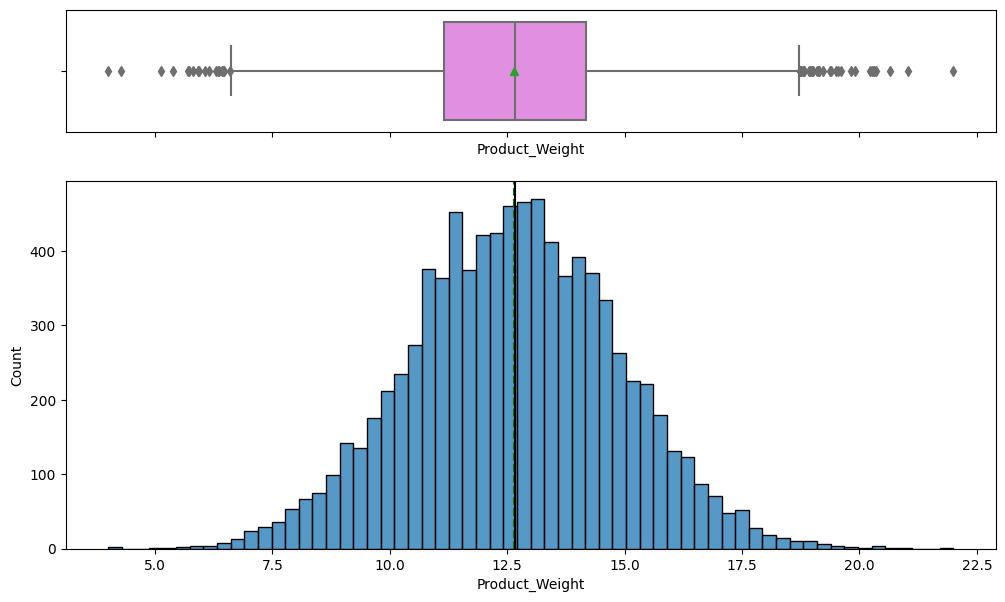

In [ ]:
histogram_boxplot(data, "Product_Weight")

**Observation:__**

**Product_Allocated_Area**

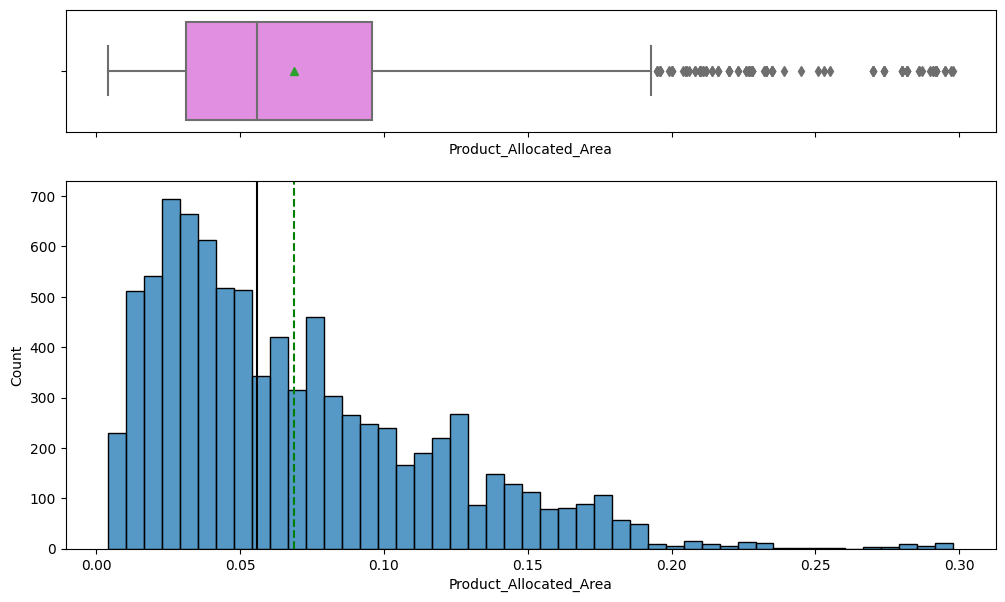

In [ ]:
# Plot the histogram and the boxplot for 'Product_Allocated_Area'
histogram_boxplot(data, "Product_Allocated_Area")

**Observation:__**

**Product_MRP**

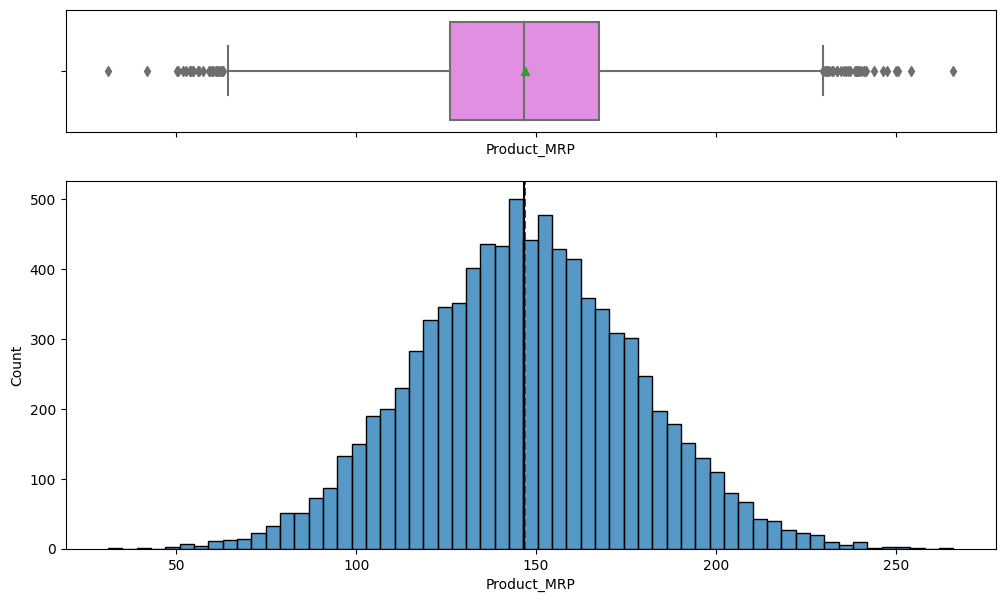

In [ ]:
# Plot the histogram and the boxplot for 'Product_MRP'
histogram_boxplot(data,'Product_MRP')

**Observation:__**

**Product_Store_Sales_Total**

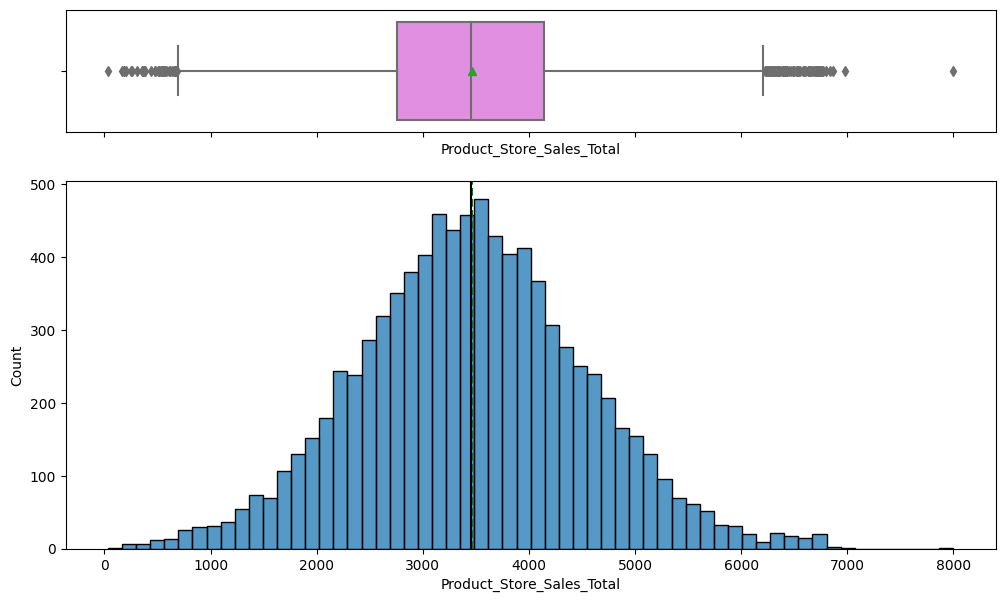

In [ ]:
# Plot the histogram and the boxplot for 'Product_Store_Sales_Total'
histogram_boxplot(data,'Product_Store_Sales_Total')

**Observation:__**

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc = False, n = None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # Length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize = (count + 1, 5))
    else:
        plt.figure(figsize = (n + 1, 5))

    plt.xticks(rotation = 90, fontsize = 15)
    ax = sns.countplot(
        data = data,
        x = feature,
        palette = "Paired",
        order = data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Percentage of each class of the category
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Width of the plot
        y = p.get_height()  # Height of the plot

        ax.annotate(
            label,
            (x, y),
            ha = "center",
            va = "center",
            size = 12,
            xytext = (0, 5),
            textcoords = "offset points",
        )  # Annotate the percentage

    plt.show()  # Show the plot

**Product_Sugar_Content**

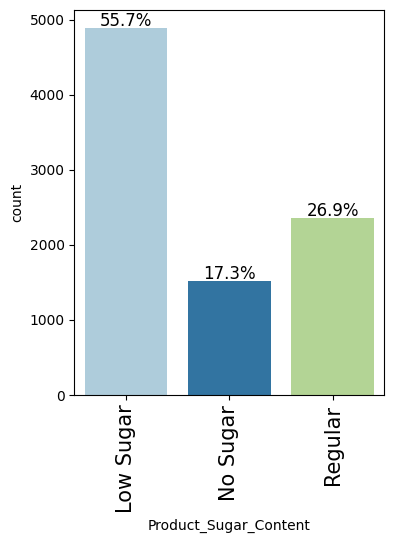

In [ ]:
labeled_barplot(data, "Product_Sugar_Content", perc = True) # Plot for Product_Sugar_Content

**Observations:__**


**Product_Type**

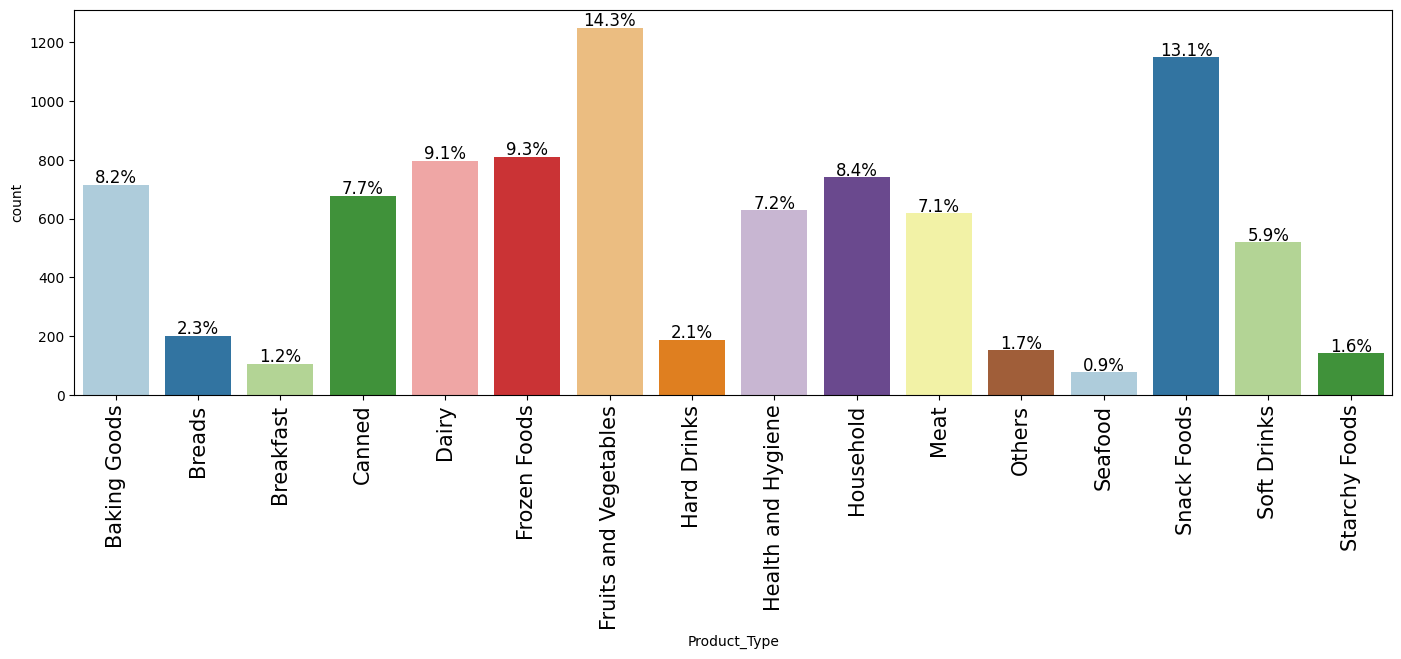

In [ ]:
# Plot the labelled barplot for 'Product_Type'
labeled_barplot(data, "Product_Type", perc = True)

**Observations:__**

**Store_Id**

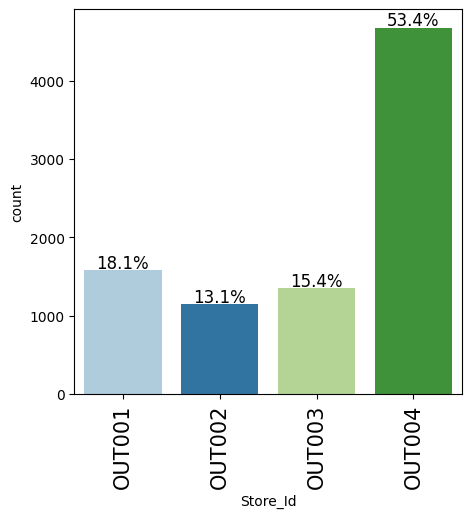

In [ ]:
# Plot the labelled barplot for 'Store_Id'
labeled_barplot(data, "Store_Id", perc = True)

**Observations:__**

**Store_Size**

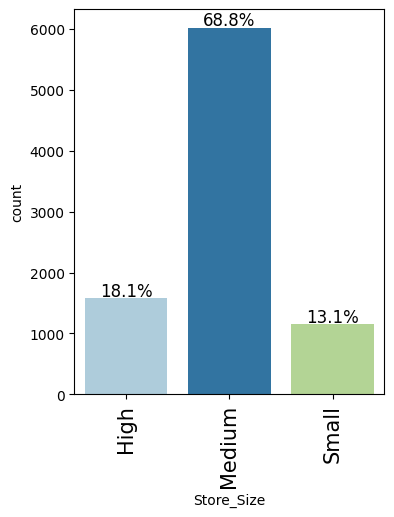

In [ ]:
# Plot the labelled barplot for 'Store_Size'
labeled_barplot(data, "Store_Size", perc = True)

**Observations:__**

**Store_Location_City_Type**

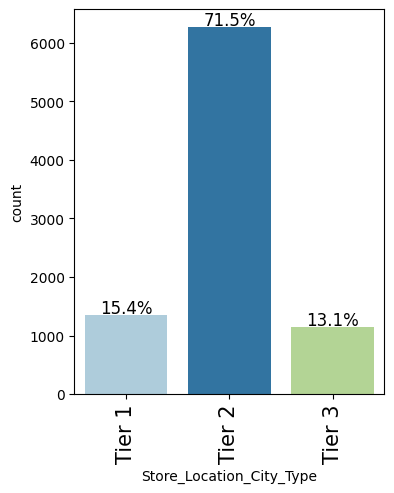

In [ ]:
# Plot the labelled barplot for 'Store_Locatiom_City_Type'
labeled_barplot(data, "Store_Location_City_Type", perc = True)


**Observations:__**

**Store_Type**

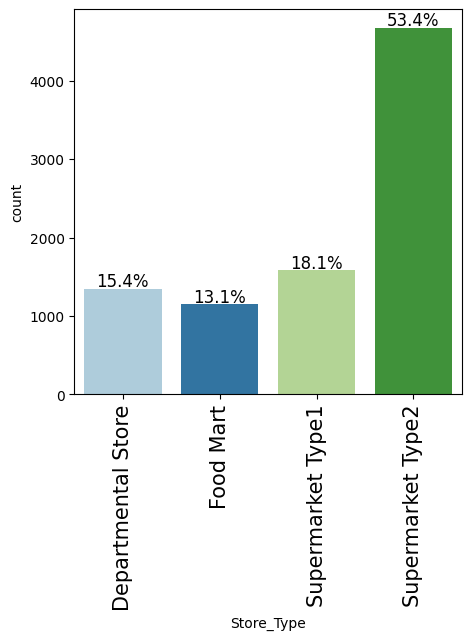

In [ ]:
# Plot the labelled barplot for 'Store_Type'
labeled_barplot(data, "Store_Type", perc = True)

**Observations:__**

### **Bivariate Analysis**

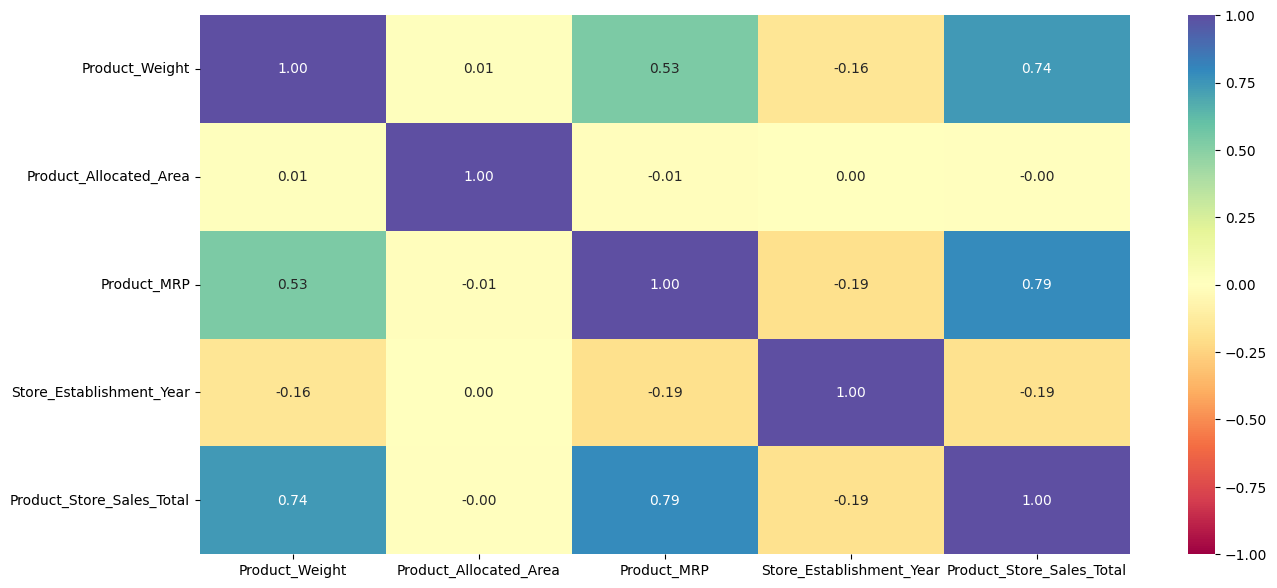

In [ ]:
# Correlation check
cols_list = data.select_dtypes(include = np.number).columns.tolist()

plt.figure(figsize = (15, 7))

sns.heatmap(
    data[cols_list].corr(), annot = True, vmin = -1, vmax = 1, fmt = ".2f", cmap = "Spectral"
)

plt.show()

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the numeric columns**

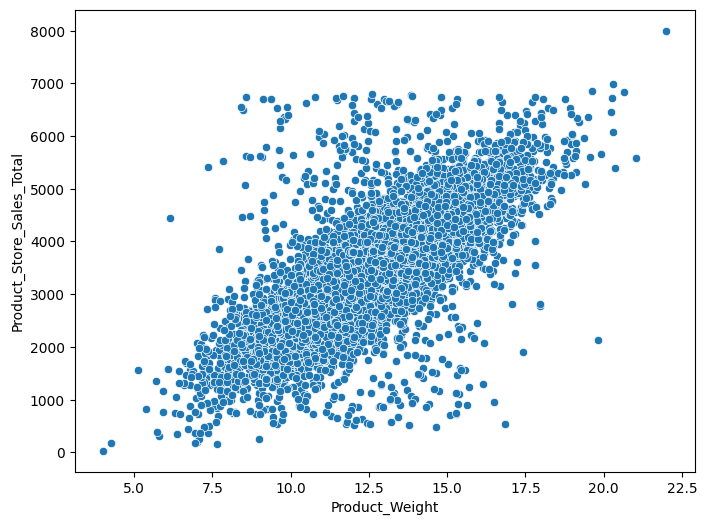

In [ ]:
plt.figure(figsize = [8, 6])

sns.scatterplot(x = data.Product_Weight, y = data.Product_Store_Sales_Total)

plt.show()

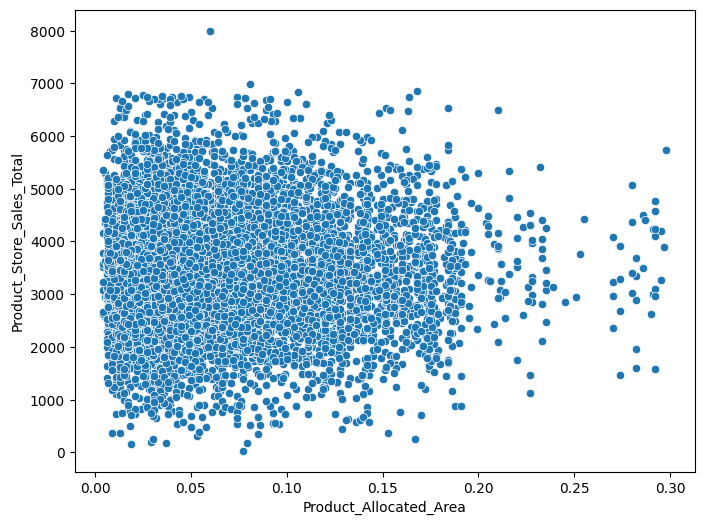

In [ ]:
# Plot the scatterplot of Product_Allocated_Area against Product_Store_Sales_Total
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_Allocated_Area, y = data.Product_Store_Sales_Total)
plt.show()

**Observations:__**

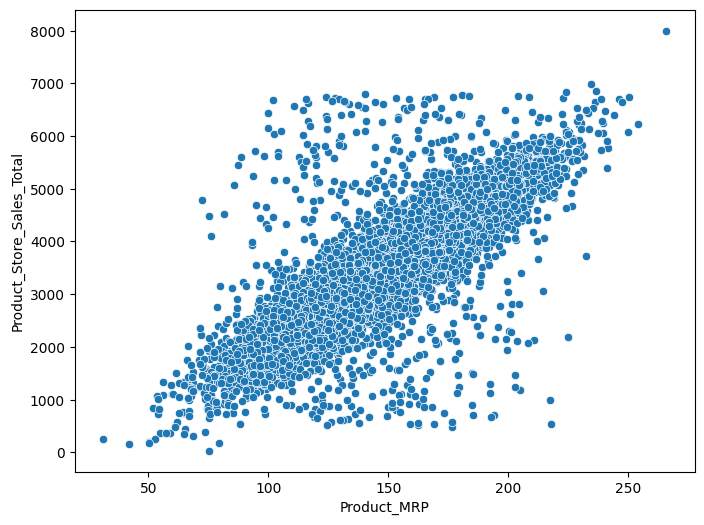

In [ ]:
# Plot the scatterplot of Product_MRP against Product_Store_Sales_Total
plt.figure(figsize = [8, 6])
sns.scatterplot(x = data.Product_MRP, y = data.Product_Store_Sales_Total)
plt.show()

**Observations:__**

**Let us see from which product type the company is generating most of the revenue**

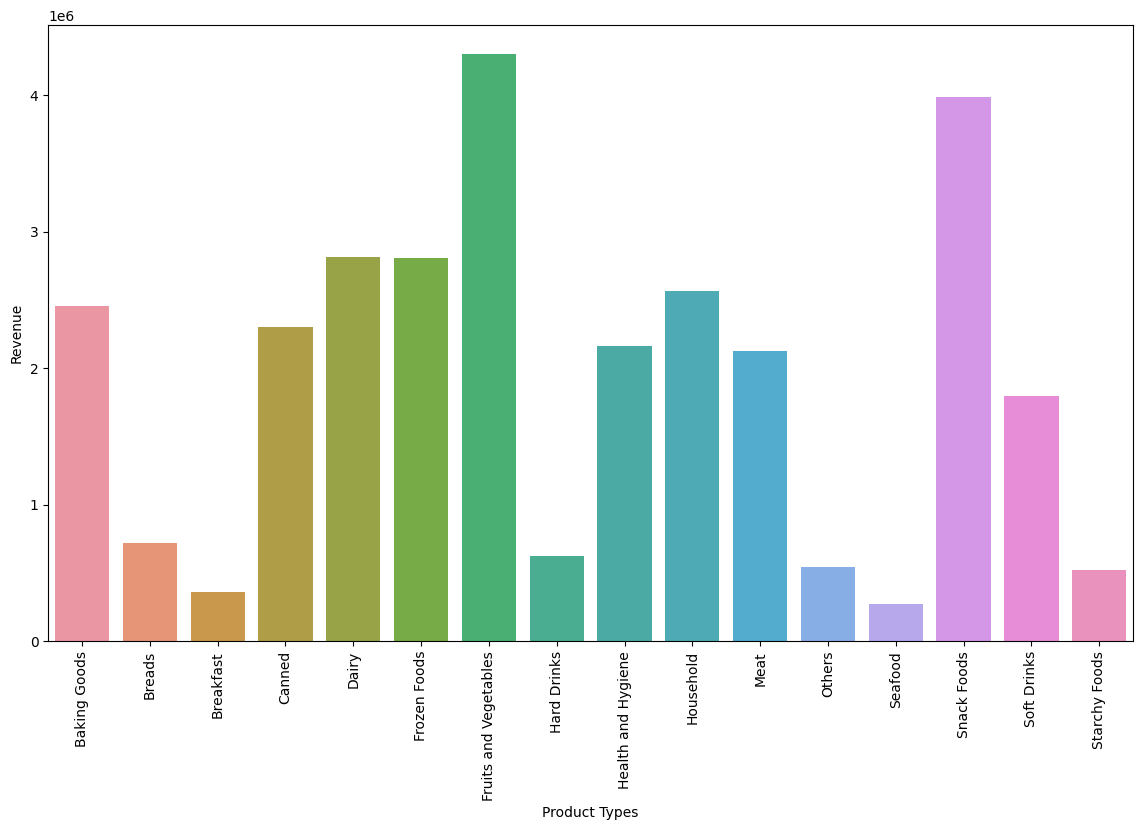

In [ ]:
df_revenue1 = data.groupby(["Product_Type"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

plt.figure(figsize = [14, 8])

plt.xticks(rotation = 90)

a = sns.barplot(x = df_revenue1.Product_Type, y = df_revenue1.Product_Store_Sales_Total)

a.set_xlabel("Product Types")

a.set_ylabel("Revenue")

plt.show()

**Product_Sugar_Content**

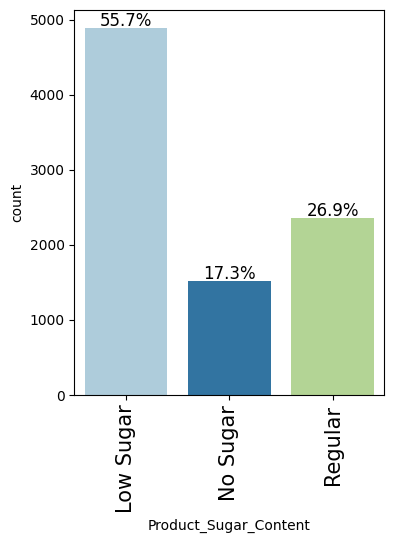

In [ ]:
# Plot the barplot to see how much Product_Sugar_Content is generating the revenue
labeled_barplot(data, "Product_Sugar_Content", perc = True)

**Observations:__**

**Let us see from which type of stores and locations the revenue generation is more**

**Store_Id**

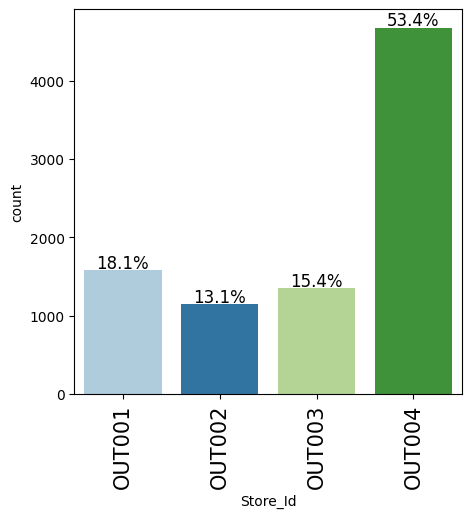

In [ ]:
# Plot the barplot to see how much Store_Id is generating the revenue
labeled_barplot(data, "Store_Id", perc = True)

**Observations:__**

**Store_Size**

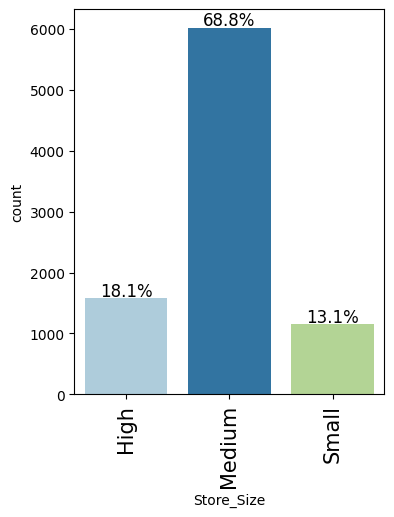

In [ ]:
# Plot the barplot to see how much Store_Size is generating the revenue
labeled_barplot(data, "Store_Size", perc = True)

**Observations:__**

**Store_Location_City_Type**

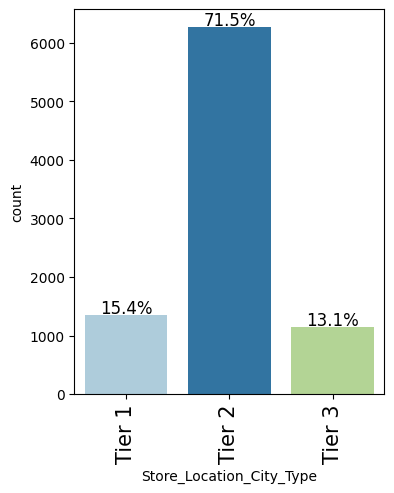

In [ ]:
# Plot the barplot to see how much Store_Location_City_Type is generating the revenue
labeled_barplot(data, "Store_Location_City_Type", perc = True)

**Observations:__**

**Store_Type**

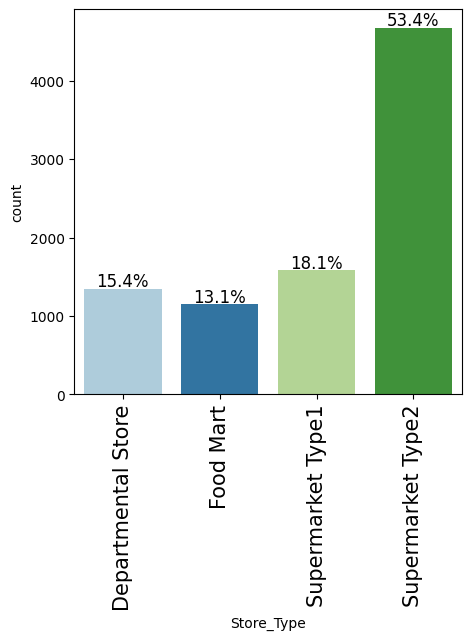

In [ ]:
# Plot the barplot to see how much Store_Type is generating the revenue
labeled_barplot(data, "Store_Type", perc = True)

**Observations:__**

**Let's check the distribution of our target variable i.e Product_Store_Sales_Total with the other categorical columns**

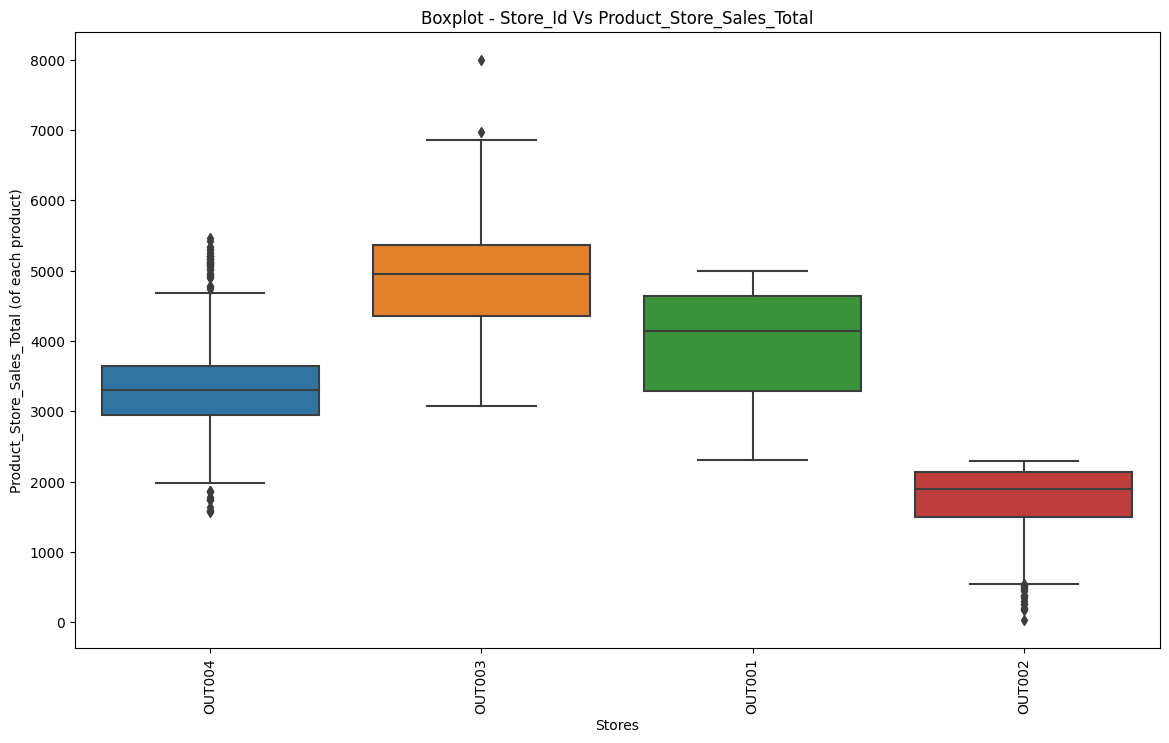

In [ ]:
plt.figure(figsize = [14, 8])

sns.boxplot(data = data, x = data.Store_Id, y = data.Product_Store_Sales_Total)

plt.xticks(rotation = 90)

plt.title("Boxplot - Store_Id Vs Product_Store_Sales_Total")

plt.xlabel("Stores")

plt.ylabel("Product_Store_Sales_Total (of each product)")

plt.show()

In [ ]:
# Plot the boxplot of Store size against Product_Store_Sales_Total

**Let's now try to find out some relationship between the other columns**

**Generally certain product types will have higher product weight than others. Let's have a look**

In [ ]:
# Plot the boxplot of Product_Type against Product_Weight

**Observations:__**

In [ ]:
# Plot the box plot of Product_Sugar_Content against Product_Weight

**Observations:__**

**Let's find out whether there is some relationship between the weight of the product and its sugar content**

In [ ]:
# Plot a box plot of Product_Sugar_Content against Product_Weight

**Observations:__**

**Let's analyze the sugar content of different product types**

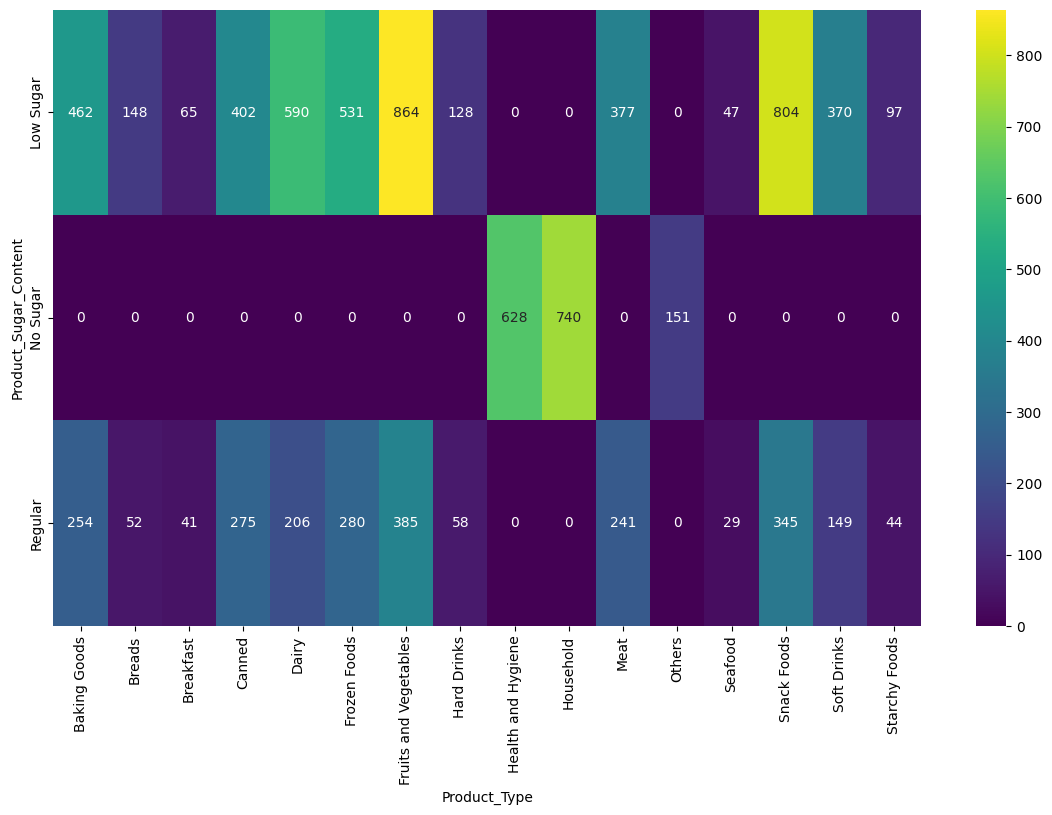

In [ ]:
plt.figure(figsize = (14, 8))

sns.heatmap(
    pd.crosstab(data["Product_Sugar_Content"], data["Product_Type"]),
    annot=True,
    fmt = "g",
    cmap = "viridis",
)

plt.ylabel("Product_Sugar_Content")
plt.xlabel("Product_Type")
plt.show()

#### Let's find out how many items of each product type has been sold in each of the stores

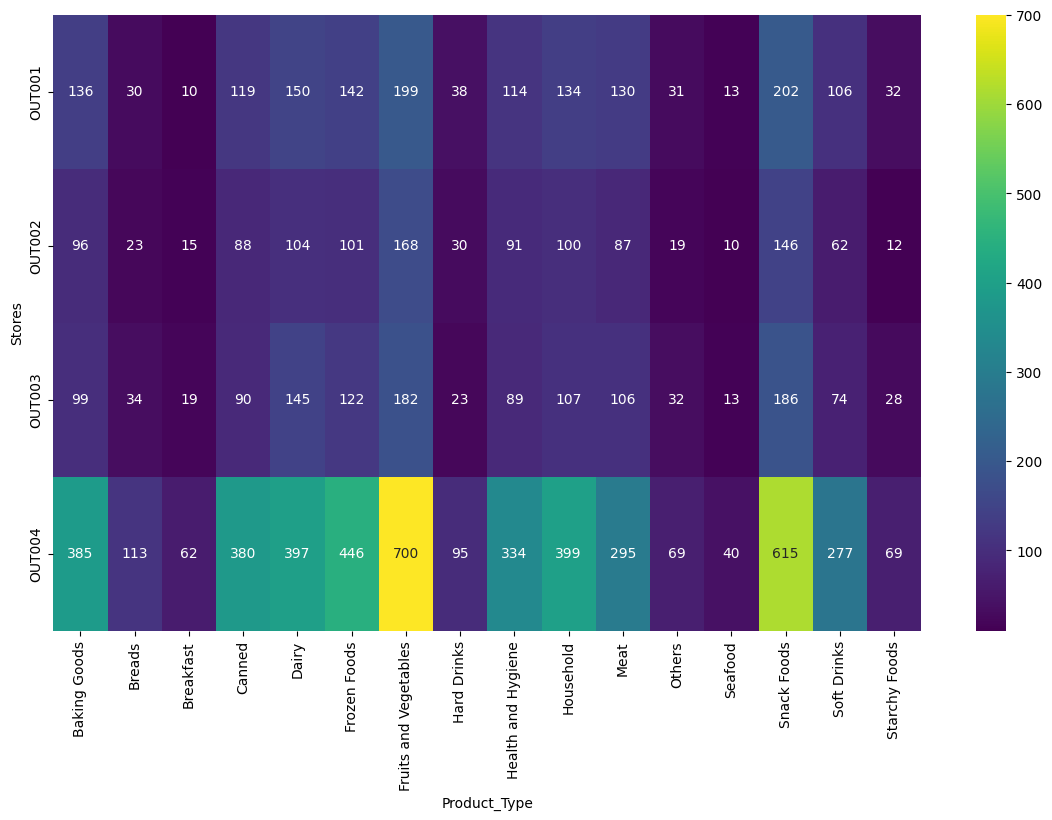

In [ ]:
# Plot heatmap with and Product_Type as x and Store_Ids as y
plt.figure(figsize = (14, 8))
sns.heatmap(
    pd.crosstab(data["Store_Id"], data["Product_Type"]),
    annot = True,
    fmt = "g",
    cmap = "viridis",
)
plt.ylabel("Stores")
plt.xlabel("Product_Type")
plt.show()

**Observations:__**

#### Different product types have different prices. Let's analyze the trend

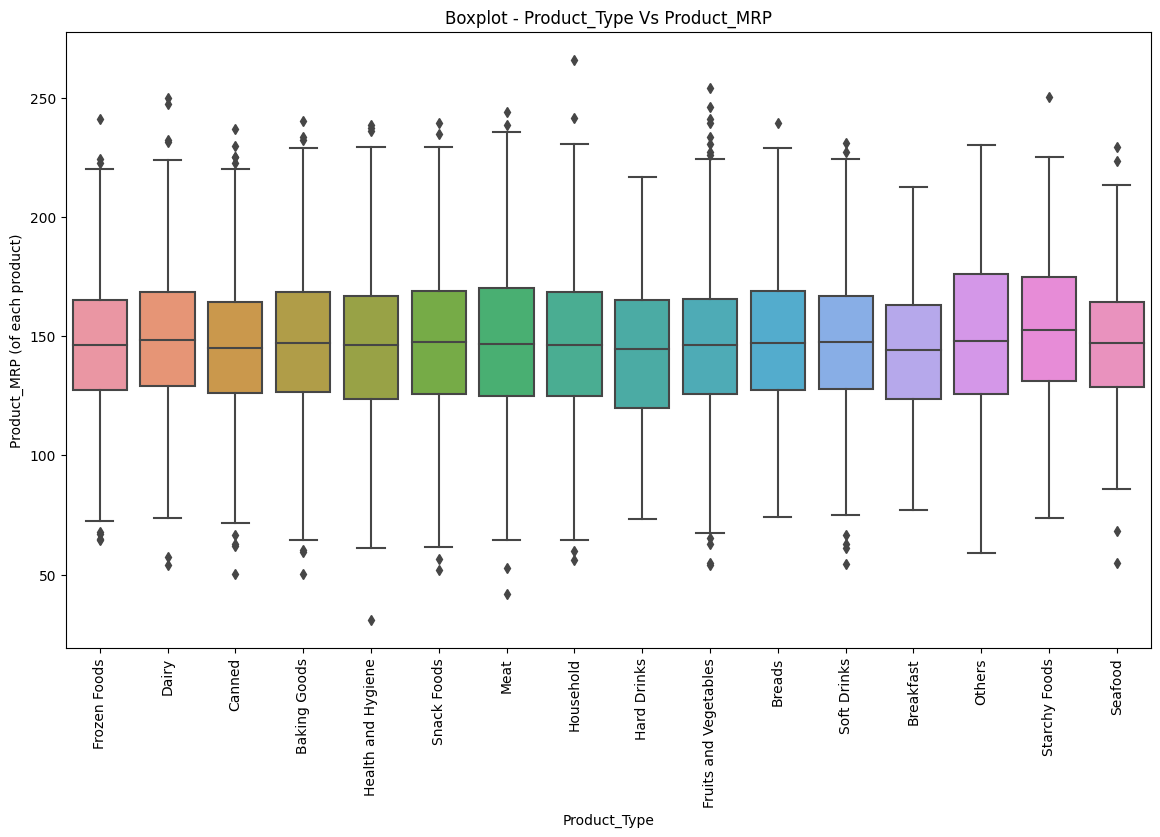

In [ ]:
# Plot a box plot of Product_Type against Product_MRP
plt.figure(figsize = [14, 8])
sns.boxplot(data = data, x = data.Product_Type, y = data.Product_MRP)
plt.xticks(rotation = 90)
plt.title("Boxplot - Product_Type Vs Product_MRP")
plt.xlabel("Product_Type")
plt.ylabel("Product_MRP (of each product)")
plt.show()

**Observations:__**

#### Let's find out how the Product_MRP varies with the different stores

In [ ]:
# Plot a box plot of box plot of Store_Id against Product_MRP

**Observations:__**

**Let's delve deeper and do a detailed analysis of each of the stores**

**OUT001**

In [ ]:
data.loc[data["Store_Id"] == "OUT001"].describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product_Weight,1586.0,NaN,NaN,NaN,13.458865,2.064975,6.16,12.0525,13.96,14.95,17.97
Product_Sugar_Content,1586,3,Low Sugar,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_Allocated_Area,1586.0,NaN,NaN,NaN,0.068768,0.047131,0.004,0.033,0.0565,0.094,0.295
Product_Type,1586,16,Snack Foods,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Product_MRP,1586.0,NaN,NaN,NaN,160.514054,30.359059,71.35,141.72,168.32,182.9375,226.59
Store_Id,1586,1,OUT001,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Establishment_Year,1586.0,NaN,NaN,NaN,1987.0,0.0,1987.0,1987.0,1987.0,1987.0,1987.0
Store_Size,1586,1,High,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Location_City_Type,1586,1,Tier 2,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Store_Type,1586,1,Supermarket Type1,1586,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.loc[data["Store_Id"] == "OUT001", "Product_Store_Sales_Total"].sum()

6223113.18

In [ ]:
df_OUT001 = (
    data.loc[data["Store_Id"] == "OUT001"]
    .groupby(["Product_Type"], as_index = False)["Product_Store_Sales_Total"]
    .sum()
)

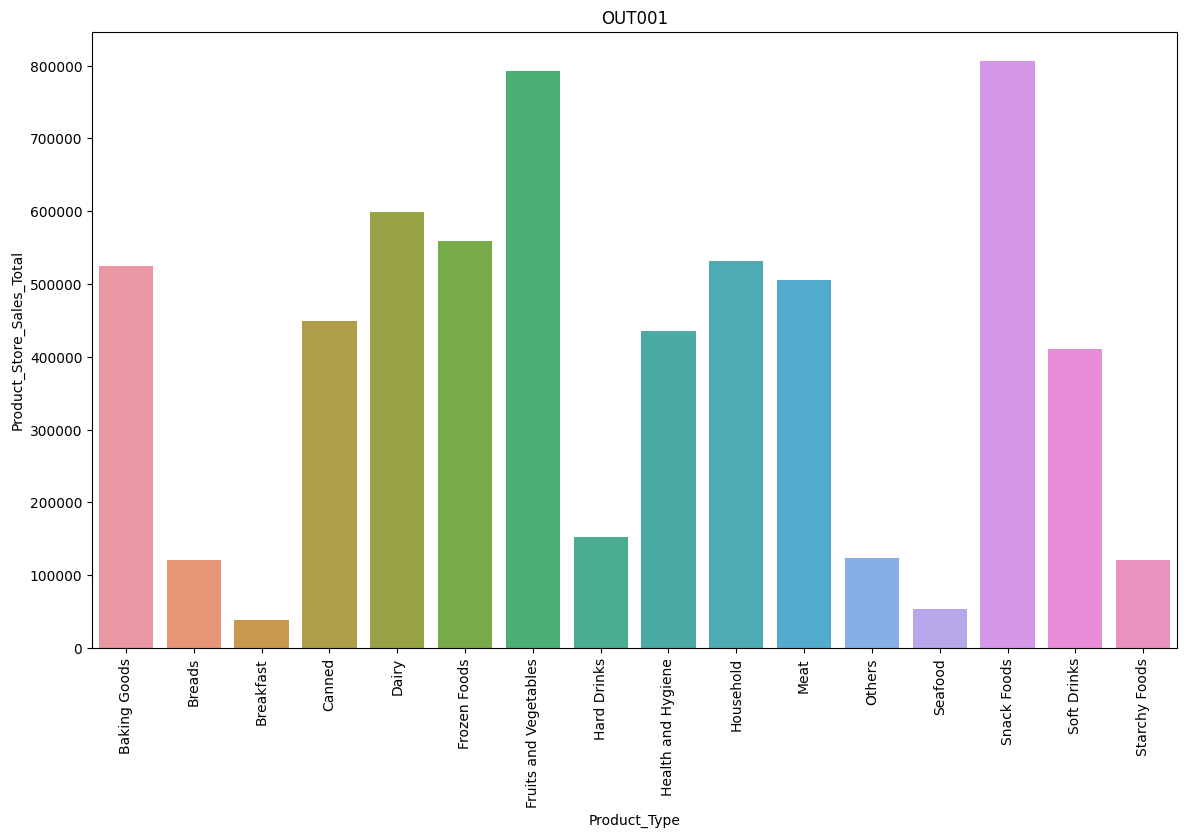

In [ ]:
plt.figure(figsize = [14, 8])
plt.xticks(rotation = 90)
plt.xlabel("Product_Type")
plt.ylabel("Product_Store_Sales_Total")
plt.title("OUT001")
sns.barplot(x = df_OUT001.Product_Type, y = df_OUT001.Product_Store_Sales_Total)
plt.show()

**Observations:__**

**OUT002**

In [ ]:
# Print the statistical summary where Store_Id is OUT002
data.loc[data['Store_Id']== 'OUT002'].describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,1152.0,9.911241,1.799846,4.000,8.7675,9.7950,10.89000,19.820
Product_Allocated_Area,1152.0,0.067747,0.047567,0.006,0.0310,0.0545,0.09525,0.292
Product_MRP,1152.0,107.080634,24.912333,31.000,92.8275,104.6750,117.81750,224.930
Store_Establishment_Year,1152.0,1998.000000,0.000000,1998.000,1998.0000,1998.0000,1998.00000,1998.000
Product_Store_Sales_Total,1152.0,1762.942465,462.862431,33.000,1495.4725,1889.4950,2133.62250,2299.630


In [ ]:
# Print the total revenue from the OUT002 Store_Id
data.loc[data['Store_Id']== 'OUT002','Product_Store_Sales_Total'].sum()

2030909.72

<Axes: title={'center': 'OUT002'}, xlabel='Product_Type', ylabel='Product_Store_Sales_Total'>

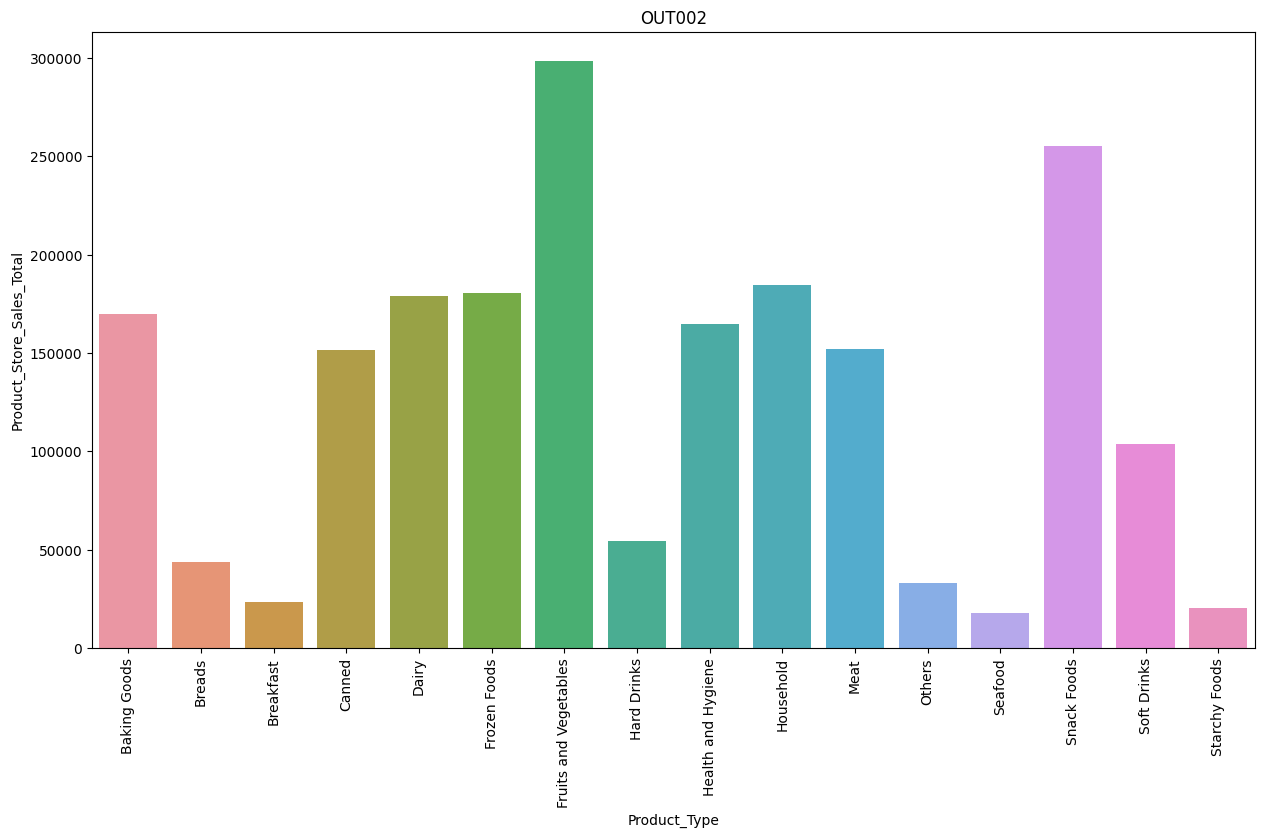

In [ ]:
df_OUT002 = (
 data.loc[data['Store_Id']== 'OUT002'].groupby('Product_Type',as_index=False)['Product_Store_Sales_Total'].sum()
)
df_OUT002
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.title('OUT002')
sns.barplot(df_OUT002,x=df_OUT002.Product_Type,y=df_OUT002.Product_Store_Sales_Total)

In [ ]:
# Plot the barplot for Product_Type from df_OUT002 against Product_Store_Sales_Total

**Observations:__**

**OUT003**

In [ ]:
# Print the statistical summary where Store_Id is OUT003
data.loc[data['Store_Id']== 'OUT003'].describe().T

,count,mean,std,min,25%,50%,75%,max
Product_Weight,1349.0,15.103692,1.893531,7.350,14.020,15.180,16.350,22.000
Product_Allocated_Area,1349.0,0.068637,0.048708,0.004,0.031,0.057,0.094,0.298
Product_MRP,1349.0,181.358725,24.796429,85.880,166.920,179.670,198.070,266.000
Store_Establishment_Year,1349.0,1999.000000,0.000000,1999.000,1999.000,1999.000,1999.000,1999.000
Product_Store_Sales_Total,1349.0,4946.966323,677.539953,3069.240,4355.390,4958.290,5366.590,8000.000


In [ ]:
# Print the total revenue from the OUT003 Store_Id
data.loc[data['Store_Id']== 'OUT003','Product_Store_Sales_Total'].sum()

6673457.57

In [ ]:
df_OUT003 = (
 data.loc[data['Store_Id']== 'OUT003'].groupby('Product_Type',as_index=False)['Product_Store_Sales_Total'].sum()
)
df_OUT003


,Product_Type,Product_Store_Sales_Total
0,Baking Goods,491908.20
1,Breads,175391.93
2,Breakfast,95634.08
3,Canned,452445.17
4,Dairy,715814.94
5,Frozen Foods,597608.42
6,Fruits and Vegetables,897437.46
7,Hard Drinks,110760.30
8,Health and Hygiene,439139.18
9,Household,523981.64


<Axes: title={'center': 'OUT003'}, xlabel='Product_Type', ylabel='Product_Store_Sales_Total'>

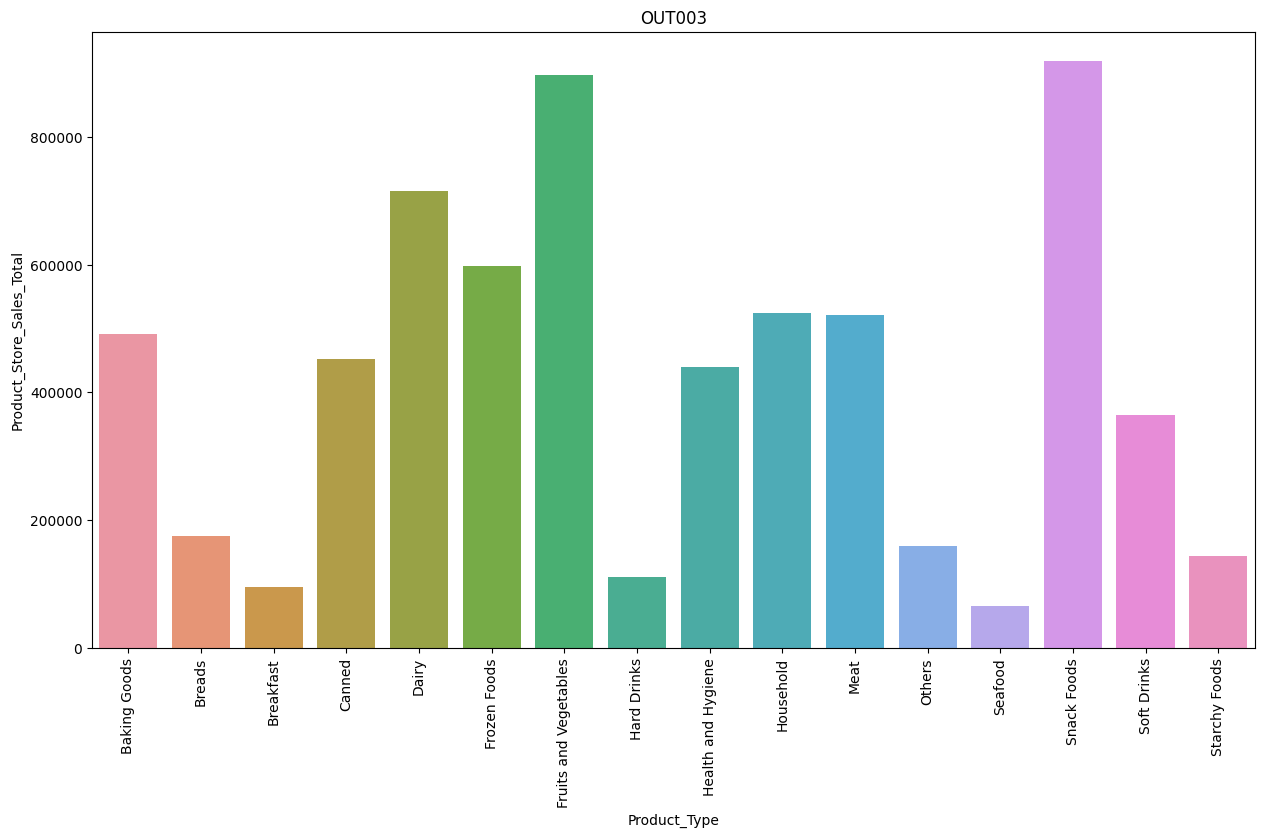

In [ ]:
# Plot the barplot for Product_Type from df_OUT003 against Product_Store_Sales_Total
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.title('OUT003')
sns.barplot(df_OUT002,x=df_OUT003.Product_Type,y=df_OUT003.Product_Store_Sales_Total)

**Observations:__**

**OUT004**

In [ ]:
# Print the statistical summary where Store_Id is OUT004
data.loc[data['Store_Id']== 'OUT004','Product_Store_Sales_Total'].sum()

15427583.43

In [ ]:
# Print the total revenue from the OUT004 Store_Id
data.loc[data['Store_Id']== 'OUT004','Product_Store_Sales_Total'].sum()

15427583.43

In [ ]:
df_OUT004 = (
 data.loc[data['Store_Id']== 'OUT004'].groupby('Product_Type',as_index=False)['Product_Store_Sales_Total'].sum()
)
df_OUT004

,Product_Type,Product_Store_Sales_Total
0,Baking Goods,1266086.26
1,Breads,374856.75
2,Breakfast,204939.13
3,Canned,1247153.50
4,Dairy,1318447.30
5,Frozen Foods,1473519.65
6,Fruits and Vegetables,2311899.66
7,Hard Drinks,307851.73
8,Health and Hygiene,1124901.91
9,Household,1324721.50


<Axes: title={'center': 'OUT004'}, xlabel='Product_Type', ylabel='Product_Store_Sales_Total'>

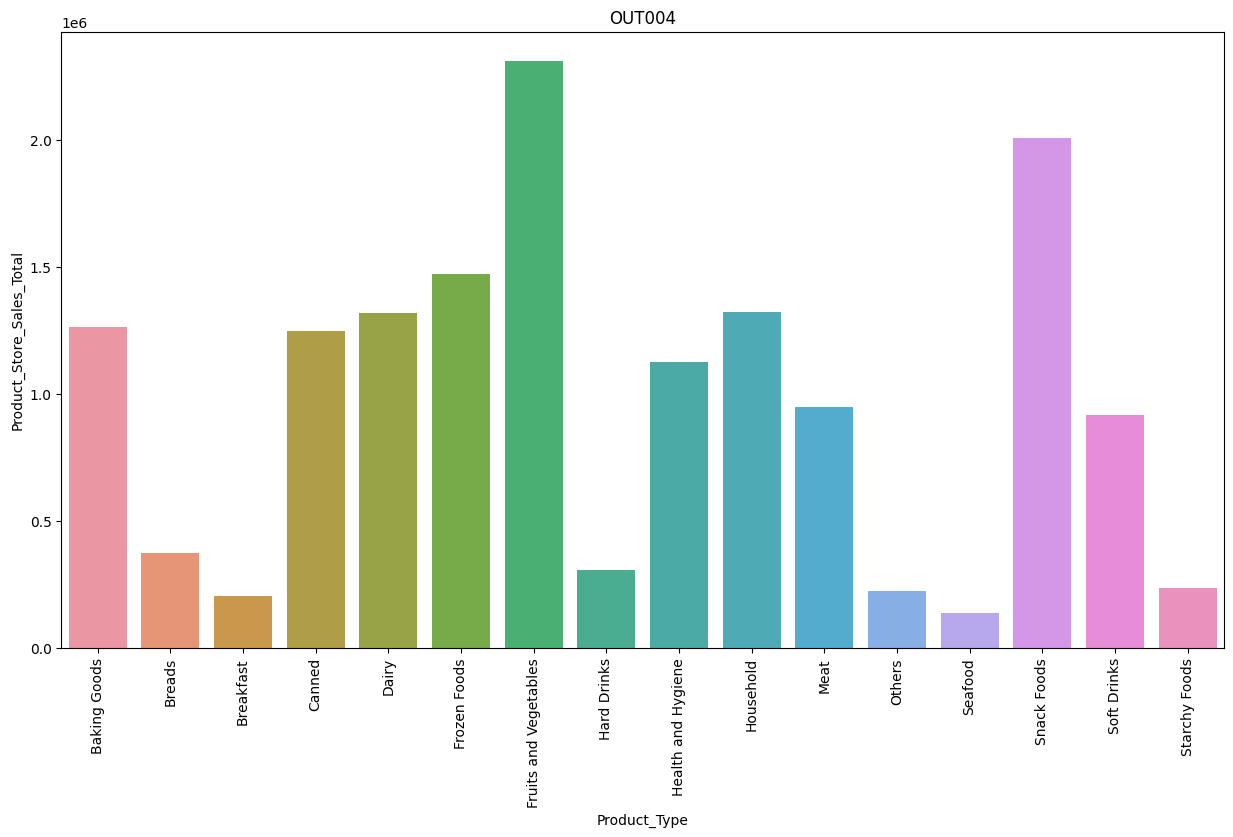

In [ ]:
# Plot the barplot for Product_Type from df_OUT004 against Product_Store_Sales_Total
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
plt.title('OUT004')
sns.barplot(df_OUT004,x=df_OUT004.Product_Type,y=df_OUT004.Product_Store_Sales_Total)

**Observations:__**

#### Let's find out the revenue generated by the stores from each of the product types

In [ ]:
df1 = data.groupby(["Product_Type", "Store_Id"], as_index = False)[
    "Product_Store_Sales_Total"
].sum()

df1

,Product_Type,Store_Id,Product_Store_Sales_Total
0,Baking Goods,OUT001,525131.04
1,Baking Goods,OUT002,169860.50
2,Baking Goods,OUT003,491908.20
3,Baking Goods,OUT004,1266086.26
4,Breads,OUT001,121274.09
5,Breads,OUT002,43419.47
6,Breads,OUT003,175391.93
7,Breads,OUT004,374856.75
8,Breakfast,OUT001,38161.10
9,Breakfast,OUT002,23396.10


**Observations:_____**

#### Let's find out the revenue generated by the stores from products having different levels of sugar content

In [ ]:
df2 = data.groupby("Store_Id")["Product_Store_Sales_Total"].sum() # Fill in the blanks to find the revenue generated by each store for the different sugar content level items
df2

Store_Id
OUT001     6223113.18
OUT002     2030909.72
OUT003     6673457.57
OUT004    15427583.43
Name: Product_Store_Sales_Total, dtype: float64

**Observations:____**

## **Data Preprocessing**

### **Feature Engineering**

**A store which has been in the business for a long duration is more trustworthy than the newly established ones. On the other hand, older stores may sometimes lack infrastructure if proper attention is not given. So let us calculate the current age of the store and incorporate that in our model.(The data of the sales records was collected in 2021, so we will use 2021 as the base year to calculate the store age)**

In [ ]:
# Outlet Age
data["Store_Age_Years"] = 2021 - data["Store_Establishment_Year"] # Fill in the blank and use Store_Establishment_Year to extract the present store age

**We have 16 different product types in our dataset. So let us make two broad categories, perishables and non perishables, in order to reduce the number of product types.**

In [ ]:
perishables = [
    "Dairy",
    "Meat",
    "Fruits and Vegetables",
    "Breakfast",
    "Breads",
    "Seafood",
]

In [ ]:
def change(x):
    if x in perishables:
        return "Perishables"
    else:
        return "Non Perishables"


data.Product_Type.apply(change)

0       Non Perishables
1           Perishables
2       Non Perishables
3       Non Perishables
4       Non Perishables
             ...       
8758    Non Perishables
8759    Non Perishables
8760    Non Perishables
8761    Non Perishables
8762    Non Perishables
Name: Product_Type, Length: 8763, dtype: object

In [ ]:
change1 = []
for i in range(0, len(data)):
    if data.Product_Type[i] in perishables:
        change1.append("Perishables")
    else:
        change1.append("Non Perishables")

In [ ]:
data["Product_Type_Category"] = pd.Series("change1") # Fill in the blank and use change1 to create a new column

In [ ]:
data.head()

,Product_Id,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_Type,Product_MRP,Store_Id,Store_Establishment_Year,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total
0,FD6114,12.66,Low Sugar,0.027,Frozen Foods,117.08,OUT004,2009,Medium,Tier 2,Supermarket Type2,2842.40
1,FD7839,16.54,Low Sugar,0.144,Dairy,171.43,OUT003,1999,Medium,Tier 1,Departmental Store,4830.02
2,FD5075,14.28,Regular,0.031,Canned,162.08,OUT001,1987,High,Tier 2,Supermarket Type1,4130.16
3,FD8233,12.10,Low Sugar,0.112,Baking Goods,186.31,OUT001,1987,High,Tier 2,Supermarket Type1,4132.18
4,NC1180,9.57,No Sugar,0.010,Health and Hygiene,123.67,OUT002,1998,Small,Tier 3,Food Mart,2279.36


### **Outlier Check**

- Let's check for outliers in the data.

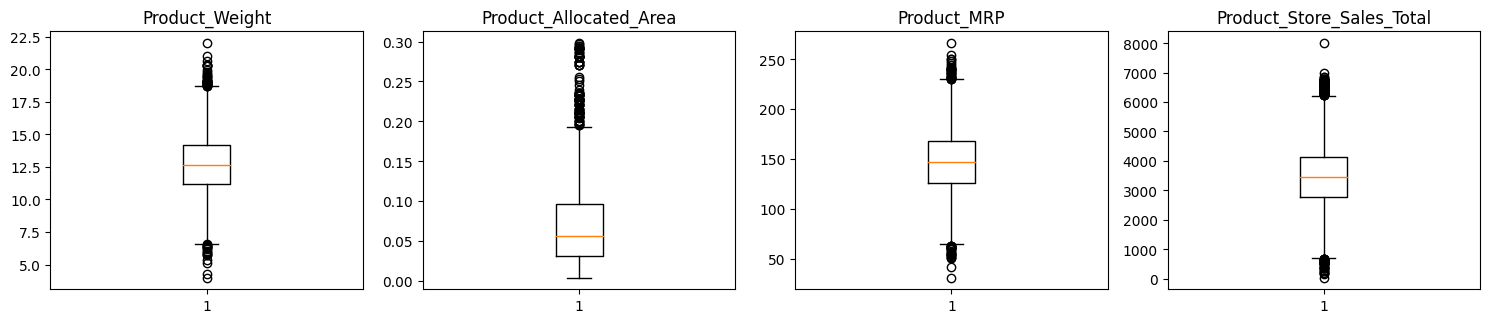

In [ ]:
# Outlier detection using boxplot
numeric_columns = data.select_dtypes(include = np.number).columns.tolist()
numeric_columns.remove("Store_Establishment_Year")
numeric_columns.remove("Store_Age_Years")


plt.figure(figsize = (15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations:________**

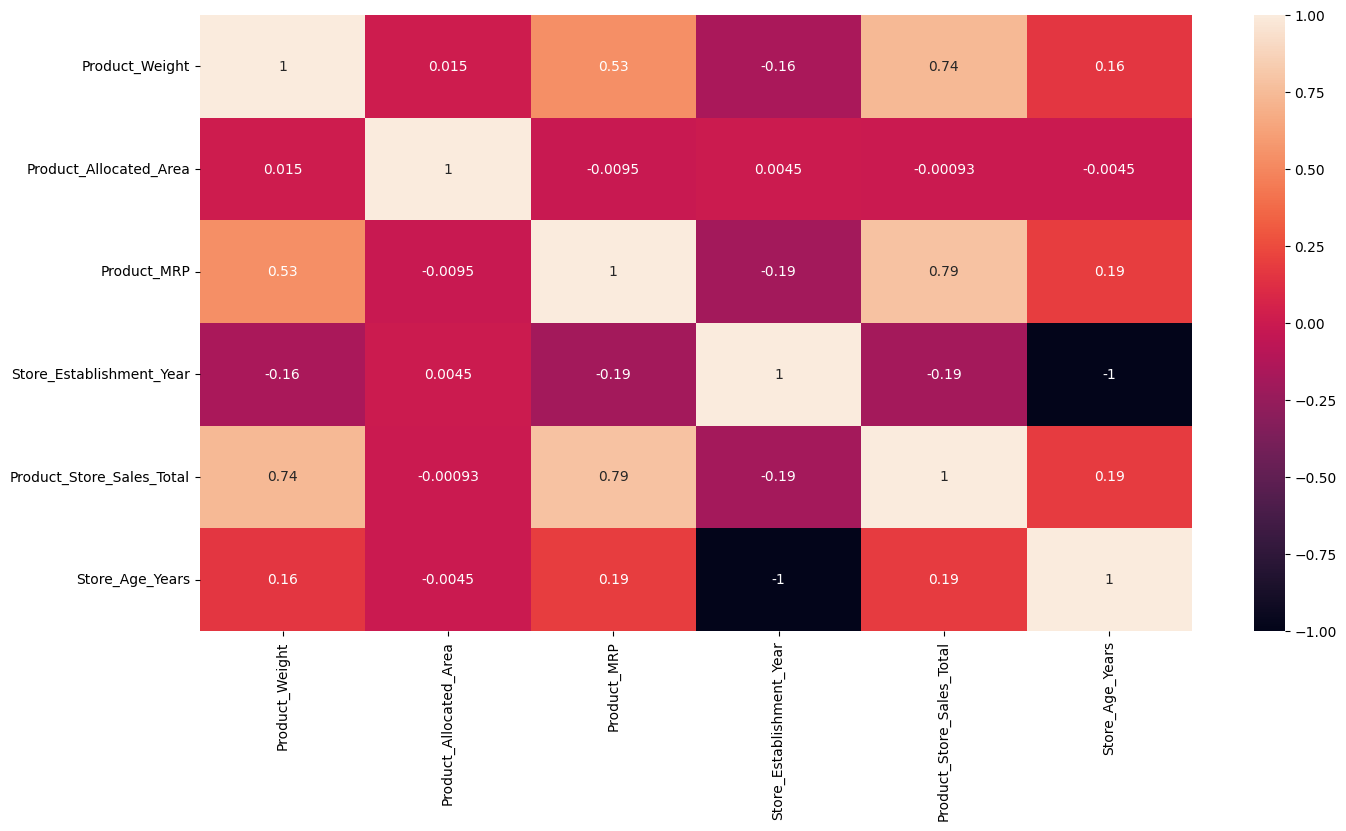

In [ ]:
plt.figure(figsize = (16, 8))
sns.heatmap(data.corr(), annot = True)
plt.show()

**Observations:____**

### **Data Preparation for modeling**

- We want to forecast the Product_Store_Sales_Total.
- Before we proceed to build a model, we'll have to encode categorical features and drop the unnecessary columns
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
# Drop the "Product_Type", "Store_Id", "Store_Establishment_Year" variables from the data
data.drop(["Product_Type", "Store_Id", "Store_Establishment_Year"],axis=1)

,Product_Weight,Product_Sugar_Content,Product_Allocated_Area,Product_MRP,Store_Size,Store_Location_City_Type,Store_Type,Product_Store_Sales_Total,Product_Id_char,Store_Age_Years,Product_Type_Category
0,12.66,Low Sugar,0.027,117.08,Medium,Tier 2,Supermarket Type2,2842.40,FD,12,change1
1,16.54,Low Sugar,0.144,171.43,Medium,Tier 1,Departmental Store,4830.02,FD,22,NaN
2,14.28,Regular,0.031,162.08,High,Tier 2,Supermarket Type1,4130.16,FD,34,NaN
3,12.10,Low Sugar,0.112,186.31,High,Tier 2,Supermarket Type1,4132.18,FD,34,NaN
4,9.57,No Sugar,0.010,123.67,Small,Tier 3,Food Mart,2279.36,NC,23,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8758,14.80,No Sugar,0.016,140.53,Medium,Tier 2,Supermarket Type2,3806.53,NC,12,NaN
8759,14.06,No Sugar,0.142,144.51,Medium,Tier 2,Supermarket Type2,5020.74,NC,12,NaN
8760,13.48,No Sugar,0.017,88.58,High,Tier 2,Supermarket Type1,2443.42,NC,34,NaN
8761,13.89,No Sugar,0.193,168.44,High,Tier 2,Supermarket Type1,4171.82,NC,34,NaN


In [ ]:
# Apply get_dummies on the dataframe data
data= pd.get_dummies(
    data,
    columns=data.select_dtypes(include = ["object", "category"]).columns.tolist(),
     drop_first = True
)

In [ ]:
# Separating features and the target column
X = data.drop(['Product_Store_Sales_Total'],axis=1)

y = data['Product_Store_Sales_Total']

In [ ]:
X = sm.add_constant(X)

In [ ]:
# Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=.3,random_state=1)

In [ ]:
X_train.shape, X_test.shape

((6134, 35), (2629, 35))

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                               feature       VIF
0                                const  0.000000
1                       Product_Weight  1.755849
2               Product_Allocated_Area  1.002771
3                          Product_MRP  1.887167
4             Store_Establishment_Year       inf
5                      Store_Age_Years       inf
6       Product_Sugar_Content_No Sugar       inf
7        Product_Sugar_Content_Regular  1.099839
8                  Product_Type_Breads  1.251745
9               Product_Type_Breakfast  1.128543
10                 Product_Type_Canned  1.787087
11                  Product_Type_Dairy  1.885845
12           Product_Type_Frozen Foods  1.898041
13  Product_Type_Fruits and Vegetables  2.319649
14            Product_Type_Hard Drinks       inf
15     Product_Type_Health and Hygiene       inf
16              Product_Type_Household       inf
17                   Product_Type_Meat  1.716291
18                 Product_Type_Others       inf
19                Pr

**Observations:**
- The VIF of Product_Weight, Product_Allocation_Area, Product_MRP, Product_Id_char_FD are less.

In [ ]:
X_train = X_train.drop('Store_Age_Years',axis = 1)

X_test = X_test.drop('Store_Age_Years',axis = 1)

### **Check for Multicollinearity**

We will use the Variance Inflation Factor (VIF), to check if there is multicollinearity in the data.

Features having a VIF score > 5 will be dropped / treated till all the features have a VIF score < 5

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] =train.columns # Store the train columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

                               feature       VIF
0                                const  0.000000
1                       Product_Weight  1.755849
2               Product_Allocated_Area  1.002771
3                          Product_MRP  1.887167
4             Store_Establishment_Year       inf
5       Product_Sugar_Content_No Sugar       inf
6        Product_Sugar_Content_Regular  1.099839
7                  Product_Type_Breads  1.251745
8               Product_Type_Breakfast  1.128543
9                  Product_Type_Canned  1.787087
10                  Product_Type_Dairy  1.885845
11           Product_Type_Frozen Foods  1.898041
12  Product_Type_Fruits and Vegetables  2.319649
13            Product_Type_Hard Drinks       inf
14     Product_Type_Health and Hygiene       inf
15              Product_Type_Household       inf
16                   Product_Type_Meat  1.716291
17                 Product_Type_Others       inf
18                Product_Type_Seafood  1.099580
19            Produc

**Observations:__**

## **Building Models**

Let's create a function to calculate the performance metrics for our regression model so that we don't need to use the same code repeatedly.

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error

# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # Insample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    np.sqrt(mean_squared_error(y_pred_train, y_observed_train)),
                    np.sqrt(mean_squared_error(y_pred_test, y_observed_test)),
                ],
                "MAE": [
                    mean_absolute_error(y_pred_train, y_observed_train),
                    mean_absolute_error(y_pred_test, y_observed_test),
                ],

                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )

In [ ]:
# Create the OLS model and fit it
model1 = sm.OLS(y_train, X_train).fit()


In [ ]:
# Get the model summary
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     1300.
Date:                       Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                               17:12:32   Log-Likelihood:                -46128.
No. Observations:                       6134   AIC:                         9.230e+04
Df Residuals:                           6111   BIC:                         9.246e+04
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.2055      0.054     22.301      0.000       1.100       1.311
Product_Weight                       135.0636      3.440     39.267      0.000     128.321     141.807
Product_Allocated_Area              -145.7488    119.000     -1.225      0.221    -379.032      87.534
Product_MRP                           12.8709      0.254     50.666      0.000      12.373      13.369
Store_Establishment_Year               0.0207      0.030      0.699      0.484      -0.037       0.079
Product_Sugar_Content_No Sugar        17.0403      9.087      1.875      0.061      -0.773      34.853
Product_Sugar_Content_Regular         31.9505     13.356      2.392      0.017       5.767      58.134
Product_Type_Breads                   49.4672     42.191      1.172      0.241     -33.242     132.176
Product_Type_Breakfast                12.0208     56.317      0.213      0.831     -98.380     122.422
Product_Type_Canned                   43.6871     28.393      1.539      0.124     -11.974      99.348
Product_Type_Dairy                    37.1303     27.535      1.348      0.178     -16.848      91.108
Product_Type_Frozen Foods             32.2707     27.333      1.181      0.238     -21.311      85.852
Product_Type_Fruits and Vegetables    44.7094     24.854      1.799      0.072      -4.014      93.433
Product_Type_Hard Drinks              -0.0162     28.420     -0.001      1.000     -55.729      55.697
Product_Type_Health and Hygiene       10.0829     20.879      0.483      0.629     -30.846      51.012
Product_Type_Household                -5.5954     20.025     -0.279      0.780     -44.852      33.661
Product_Type_Meat                     -0.9200     29.172     -0.032      0.975     -58.108      56.268
Product_Type_Others                   12.5528     31.888      0.394      0.694     -49.960      75.065
Product_Type_Seafood                 107.4070     62.950      1.706      0.088     -15.997     230.811
Product_Type_Snack Foods              23.8906     25.266      0.946      0.344     -25.639      73.421
Product_Type_Soft Drinks               6.0717     20.930      0.290      0.772     -34.958      47.102
Product_Type_Starchy Foods            67.5867     47.181      1.432      0.152     -24.905     160.078
Store_Id_OUT002                     -254.8265      5.512    -46.234      0.000    -265.631    -244.022
Store_Id_OUT003                      347.9898      8.129     42.807      0.000     332.054     363.926
Store_Id_OUT004                     -171.2765      5.288    -32.389      0.000    -181.643    -160.910
Store_Size_Medium                    176.7133      5.774     30.604      0.000     165.394     188.033
Store_Size_Small   

In [ ]:
# Checking model1 performance
model_pref(model1,X_train,X_test)


    Data        RMSE         MAE        r2
0  Train  446.341473  261.975261  0.786307
1   Test  446.771537  267.071109  0.790358


**Observations:____**

### **Drop insignificant variables (variables with p-value > 0.05) from the above model and create the regression model again.**

In [ ]:
X_train1 = X_train.drop([ "Product_Id_char_FD"], axis = 1)# Please drop the insiginificant variables from the X_train


In [ ]:
X_test1 =  X_test.drop([ "Product_Id_char_FD"], axis = 1) # Please drop the insiginificant variables from the X_test

In [ ]:
# Create the OLS model and fit it
model2 = sm.OLS(y_train, X_train1).fit()

In [ ]:
# Get the model summary
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Product_Store_Sales_Total   R-squared:                       0.824
Model:                                   OLS   Adj. R-squared:                  0.823
Method:                        Least Squares   F-statistic:                     1300.
Date:                       Tue, 26 Dec 2023   Prob (F-statistic):               0.00
Time:                               17:26:51   Log-Likelihood:                -46128.
No. Observations:                       6134   AIC:                         9.230e+04
Df Residuals:                           6111   BIC:                         9.246e+04
Df Model:                                 22                                         
Covariance Type:                   nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                  1.2048      0.054     22.281      0.000       1.099       1.311
Product_Weight                       135.0636      3.440     39.267      0.000     128.321     141.807
Product_Allocated_Area              -145.7488    119.000     -1.225      0.221    -379.032      87.534
Product_MRP                           12.8709      0.254     50.666      0.000      12.373      13.369
Store_Establishment_Year               0.0098      0.031      0.319      0.750      -0.050       0.070
Product_Sugar_Content_No Sugar        26.4218     11.483      2.301      0.021       3.911      48.933
Product_Sugar_Content_Regular         31.9505     13.356      2.392      0.017       5.767      58.134
Product_Type_Breads                   49.4672     42.191      1.172      0.241     -33.242     132.176
Product_Type_Breakfast                12.0208     56.317      0.213      0.831     -98.380     122.422
Product_Type_Canned                   43.6871     28.393      1.539      0.124     -11.974      99.348
Product_Type_Dairy                    37.1303     27.535      1.348      0.178     -16.848      91.108
Product_Type_Frozen Foods             32.2707     27.333      1.181      0.238     -21.311      85.852
Product_Type_Fruits and Vegetables    44.7094     24.854      1.799      0.072      -4.014      93.433
Product_Type_Hard Drinks              21.8740     42.787      0.511      0.609     -62.004     105.752
Product_Type_Health and Hygiene       13.2101     20.885      0.633      0.527     -27.733      54.153
Product_Type_Household                -2.4683     20.005     -0.123      0.902     -41.686      36.749
Product_Type_Meat                     -0.9200     29.172     -0.032      0.975     -58.108      56.268
Product_Type_Others                   15.6800     32.153      0.488      0.626     -47.351      78.711
Product_Type_Seafood                 107.4070     62.950      1.706      0.088     -15.997     230.811
Product_Type_Snack Foods              23.8906     25.266      0.946      0.344     -25.639      73.421
Product_Type_Soft Drinks              27.9620     30.724      0.910      0.363     -32.268      88.192
Product_Type_Starchy Foods            67.5867     47.181      1.432      0.152     -24.905     160.078
Store_Id_OUT002                     -254.8156      5.512    -46.232      0.000    -265.620    -244.011
Store_Id_OUT003                      347.9877      8.129     42.807      0.000     332.052     363.924
Store_Id_OUT004                     -171.2180      5.289    -32.372      0.000    -181.587    -160.849
Store_Size_Medium                    176.7697      5.775     30.608      0.000     165.448     188.091
Store_Size_Small   

In [ ]:
# Checking model2 performance
model_pref(model2,X_train1,X_test1)


    Data        RMSE         MAE        r2
0  Train  446.341473  261.975261  0.786307
1   Test  446.771537  267.071109  0.790358


**Observations:____**

### **Checking the below linear regression assumptions**

1. **Mean of residuals should be 0**
2. **No Heteroscedasticity**
3. **Linearity of variables**
4. **Normality of error terms**

### **1. Check for mean residuals**

In [ ]:
residuals = model2.resid

np.mean(residuals)

7.256267216988211e-11

**Observations:____**

### **2. Check for homoscedasticity**

- Homoscedasticity - If the residuals are symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedasticity- - If the residuals are not symmetrically distributed across the regression line, then the data is said to be heteroscedastic. In this case, the residuals can form a funnel shape or any other non-symmetrical shape.

- We'll use `Goldfeldquandt Test` to test the following hypothesis with alpha = 0.05:

    - Null hypothesis: Residuals are homoscedastic
    - Alternate hypothesis: Residuals have heteroscedastic

In [ ]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [ ]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 0.9815215417488454), ('p-value', 0.6965395182596078)]

**Observations:____**

### **3. Linearity of variables**

It states that the predictor variables must have a linear relation with the dependent variable.

To test the assumption, we'll plot residuals and the fitted values on a plot and ensure that residuals do not form a strong pattern. They should be randomly and uniformly scattered on the x-axis.

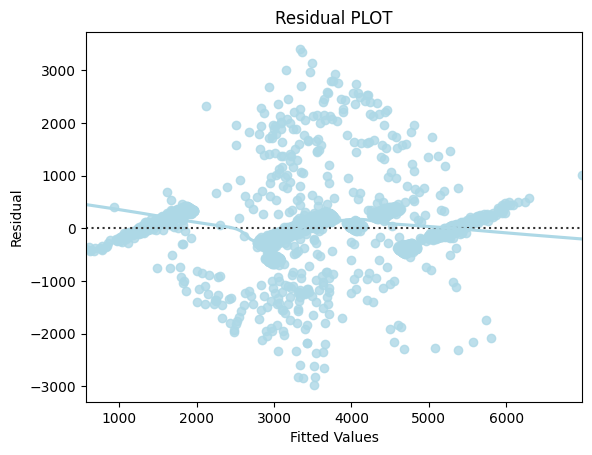

In [ ]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

**Observations:_____**

### **4. Normality of error terms**

The residuals should be normally distributed.

<Axes: ylabel='Count'>

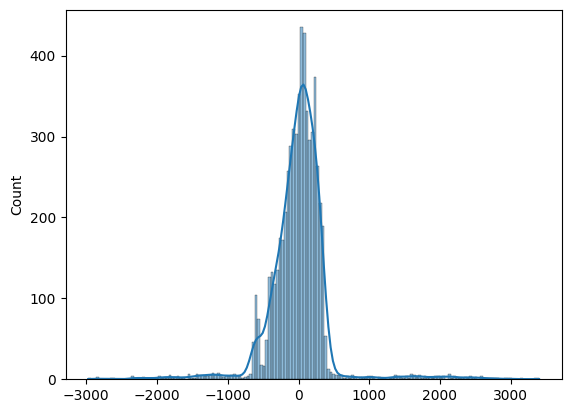

In [ ]:
# Plot histogram of residuals
sns.histplot(residuals, kde=True)
# Write your code here

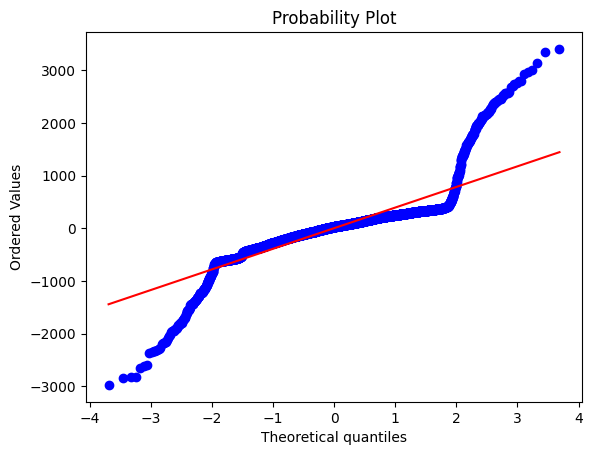

In [ ]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

**Observations:_____**

### **Apply cross validation to improve the model and evaluate it using different evaluation metrics**

Let's check the performance of the model using cross-validation technique from the scikit-learn library and see if the performance on the train and the test data is comparable to what we are getting after cross-validating the data.

In [ ]:
# Import the required function

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 0.822 (+/- 0.044)
Mean Squared Error: 201306.811 (+/- 63557.619)


**Observation:__________**

## **Actionable Insights and Business Recommendations**

 This prediction model can be used  to predict the total sales that will be done by SuperKart in the next quarter.

The model explains around 79% of the variation in the data.

OUT004 - OUT004, which is of Supermarket Type2, located in a Tier 2 city and having store size as medium, is performing well. SuperKart can look to increase the size of this store from medium to high. They can also look to set up stores in this type of city having comparable socio-economic conditions in order to expand their business and reach.

OUT002 - OUT002, being a food mart in a Tier 3 city and having small store size, is also performing well. SuperKart can look to upgrade its size or target similar cities for business expansion.

OUT001 - OUT001 which is a store of Supermarket Type 1, located in a Tier 2 city and having store size as high is not performing upto the mark. SuperKart can look to look build new marketing strategies (maybe give attractive discounts and offers) in this store in order to attract more customers.

OUT003 - Similar approach can be taken to increase the business of OUT003 which is a Departmental store in a Tier 1 city and having store size as medium. It is the premium store of the company where most of the costly goods are sold, so the correct set of audience should be targetted.

Daily needs like fruits and vegetables and snack foods are the biggest contributors to the revenue across all the stores. So SuperKart should look to maintain the inventory of these products properly and ensure that these products never face a shortage.

___________________________________________________________________________